# Hypothesis Testing in Python


### Uses of A/B testing

In the video, you saw how Electronic Arts used A/B testing on their website when launching SimCity 5. One version of the page showed an advertisement for a discount, and one version did not. Half the users saw one version of the page, and the other half saw the second version of the page.

What is the main reason to use an A/B test?

#### Answer the question

#### Possible Answers

1 It lets users vote on their preferred web page. ❌


2 It allows you to only give discounts to half your users. ❌


3 It is a method used to directly determine the sample size needed for your analysis. ❌


4 It provides a way to check outcomes of competing scenarios and decide which way to proceed. ✔


5 It reduces the number of errors in production. ❌


### Calculating the sample mean

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

Let's begin our analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

late_shipments is available, and pandas is loaded as pd.

#### Instructions 

1 Print the late_shipments dataset.

2 Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is "Yes".

In [ ]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

### Calculating a z-score

Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

#### Instructions

- Hypothesize that the proportion of late shipments is 6%.


- Calculate the standard error from the standard deviation of the bootstrap distribution.


- Calculate the z-score.

In [ ]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof = 1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Print z_score
print(z_score)

### Criminal trials and hypothesis tests

In the video, you saw how hypothesis testing follows a similar process to criminal trials.

Which of the following correctly matches up a criminal trial with properties of a hypothesis test?

#### Answer the question

#### Possible Answers

- Just as with criminal trials, there are more than two possible results at the conclusion of a hypothesis test. ❌


- Just as the defendant is initially assumed not guilty, the null hypothesis is first assumed to be true. ✔


- The defendant can be both guilty and not guilty for the crime charged, and both the null and alternative hypotheses can be chosen at the end of the test. ❌


- Just as a court can decline to give a verdict, it's possible for neither the null hypothesis nor the alternative hypothesis to be chosen at the end of the test. ❌


- Just as the defendant is initially assumed guilty, the alternative hypothesis is first assumed to be true. ❌


### Left tail, right tail, two tails

Hypothesis tests are used to determine whether the sample statistic lies in the tails of the null distribution. However, the way that the alternative hypothesis is phrased affects which tail(s) we are interested in.

#### Instructions

- Determine the appropriate type of hypothesis test for answering these questions.

#### Answers

##### Two tails
- Is there a difference between the voting preferences of 40-year-olds and 80-year-olds?
- Should we expect Slack and Zoom to have dissimilar mean numbers of employees over the last three years?

##### Left tail
- Is there evidence to conclude that Belgian workers tend to have lower salaries than italian workers?
- Are grapes lower in popularity than raisins, on average?

##### Right tail
- Do hamburgers have more calories than hot dogs, on average?
- Do cats tend to live longer than dogs?
- Does there tend to be more than 12 fluid ounces of soda per can?
   
### Calculating p-values

In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, $H_{0}$, is that the proportion of late shipments is six percent.

The alternative hypothesis, $H_{A}$, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

#### Instructions 

#### Question

1. What type of test should be used for this alternative hypothesis?

#### Possible Answers

- Two-tailed ❌


- Left-tailed ❌


- Right-tailed ✔


- It doesn't matter; any one will do. ❌


- A hypothesis test isn't appropriate to answer this question. ❌


2. Calculate the z-score of late_prop_samp.


3. Calculate the p-value for the z-score, using a right-tailed test.



In [ ]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

### Decisions from p-values

The p-value, denoted here as $p$, is a measure of the amount of evidence to reject the null hypothesis or not. By comparing the p-value to the significance level, $\alpha$, you can make a decision about which hypothesis to support.

Which of the following is the correct conclusion from the decision rule for a significance level $\alpha$?

#### Answer the question

#### Possible Answers

- If the $p \leq \alpha$, reject $H_{A}$. ❌


- If the $p \geq \alpha$, reject $H_{A}$. ❌


- If the $p \leq \alpha$, don't reject $H_{0}$. ❌


- If the $p \leq \alpha$, reject $H_{0}$. ✔



#### Calculating a confidence interval

If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

#### Instructions 

- Calculate a 95% confidence interval from late_shipments_boot_distn using the quantile method, labeling the lower and upper intervals lower and upper.


In [ ]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

#### Question

- Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?

#### Possible Answers

- Yes, since 0.06 is included in the 95% confidence interval and we failed to reject $H_{0}$ due to a large p-value, the results are similar. ✔


- No, since 0.06 is included in the 95% confidence interval and we should have rejected $H_{0}$ due to a large p-value, the results do not match. ❌


- No, there is no relationship between confidence intervals and hypothesis tests. ❌


### Type I and type II errors

For hypothesis tests and for criminal trials, there are two states of truth and two possible outcomes. Two combinations are correct test outcomes, and there are two ways it can go wrong.

The errors are known as false positives (or "type I errors"), and false negatives (or "type II errors").

#### Instructions


- Match the scenarios to the appropriate error type, or to "Not an error" for correct decisions.


##### False positive (Type I) errors

- Finding  the defendant guilty when infact the defendant was innocent.


- Rejecting the null hypothesis when infact the null hypothesis is true.


##### False negative (Type II) errors

- Finding the defendant not quilty when infact the defendant did commit the crime.


- Failing to reject the null hypothesis when infact the null hypothesis is false.

##### Not an error

- Finding the defendant guilty when infact they did commit the crime.


- Failing to reject the null hypothesis when infact the null hypothesis is true.


- Finding the defendant not guilty when infact they were innocent.


- Rejecting the null hypothesis when infact the null hypothesis is false.


### Hypothesis testing workflow

You've seen the hypothesis testing workflow for the one sample case where you compared a sample mean to a hypothesized value, and the two sample case where you compared two sample means. In both cases, the workflow shares common steps.

#### Instructions

- Place the hypothesis testing workflow steps in order from first to last.


#### Answer

- Identify population parameter that is hypothesized about.


- Specify the null and alternative hypotheses.


- Determine (standardized) test statistic and corresponding null distribution.


- Conduct hypothesis test in Python.


- Measure evidence against the null hypothesis.


- Make a decision comparing evidence to significance level.


- Interpret the results in the context of the original problem.


### Two sample mean test statistic

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.
 
$$t=\frac{(\bar{x}_{child} - \bar{x}_{adult})}
{\sqrt{\frac{s^2_{child}}{n_{child}}   + \frac{s^2_{adult}}{n_{aduilt}} }}$$

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

##### Instructions

- Calculate the numerator of the $t$ test statistic.


- Calculate the denominator of the $t$ test statistic.


- Use those two numbers to calculate the $t$ test statistic


In [ ]:
# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no **2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator /denominator

# Print the test statistic
print(t_stat)

### Why is t needed?

The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted $z$, and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted $t$ , and the transformation used the t-distribution.

In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?


#### Answer the question

#### Possible Answers

    
- The t-distribution is just another name for the z-distribution, so they can be used interchangeably. ❌
    
    
- The t-distribution is the same thing as the z-distribution for very small sample sizes. ❌
   
    
- When a sample standard deviation is used in estimating a standard error. ✔
   
    
- When you are comparing the means of three or more samples, rather than comparing a single sample mean to a value. ❌


### The t-distribution

The t-distribution is used to calculate the p-value from the $t$ test statistic, and having a sense of how the PDF and CDF look can help you understand this calculation. It has two parameters: the degrees of freedom, and the non-centrality parameter.

The plots show the PDF and CDF for a t-distribution (solid black line), and for comparison show a normal distribution with the same mean and variance (gray dotted line).

Which statement about the the t-distribution is true?


#### Instructions

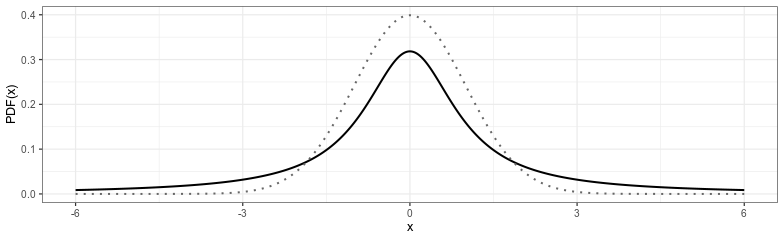





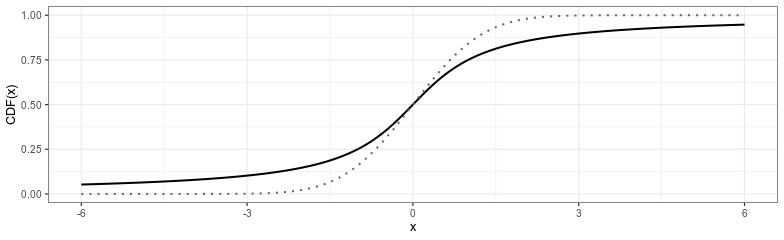


- Like the normal distribution, the PDF of a central t-distribution is always symmetric. ❌
     
    
- As you increase the degrees of freedom, the tails of the t-distribution get fatter. ❌
  
  
- As you increase the degrees of freedom, the t-distribution PDF and CDF curves get closer to those of a normal distribution. ✔
  
  
- As you increase the non-centrality, the t-distribution PDF and CDF curves get closer to those of a normal distribution. ❌


### From t to p

Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

$H_{0}$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_{A}$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

$t$ has also been imported from scipy.stats.

#### Instructions 

#### Question

1. What type of test does the alternative hypothesis indicate that we need?


#### Possible Answers

- Two-tailed ❌


- Left-tailed ✔
    
    
- Right-tailed ❌




2. Calculate the degrees of freedom for the test.
    
        
3. Compute the p-value using the test statistic, t_stat.


In [ ]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df = degrees_of_freedom)

# Print the p_value
print(p_value)

#### Question

- What decision should you make based on the results of the hypothesis test?


#### Possible Answers

    
- Fail to reject the null hypothesis. ❌


- Reject the null hypothesis. ✔


- You can't conclude anything from this hypothesis test. ❌



### Is pairing needed?

t-tests are used to compare two sample means. However, the test involves different calculations depending upon whether the two samples are paired or not. To make sure you use the correct version of the t-test, you need to be able to identify pairing.


#### Instructions


- Match the problem description with whether a paired t-test or non-paired t-test should be conducted.


##### Paired


- To test the effectiveness of a new elementary school study technique, pre- and post-tests are given to the same random sample of students.


- Scientists wish to understand whether older children like sugar less than younger children. Siblings pairs were surveyed on their sugar preferences.



##### Not paired 


- To understand how location affects income, a survey of adults living in Budapest and another survey of adults living in London were conducted.


- To test the effectiveness of a new elementary school study technique, pre- and post-tests are given to two different random samples of students.







### Visualizing the difference

Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.


#### Instructions


- Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.


- Calculate the mean of the diff column as xbar_diff.


- Calculate the standard deviation of the diff column as s_diff.


- Plot a histogram of the diff column with 20 bins.

In [ ]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins = 20)
plt.show()

### Using ttest()

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.


#### Instructions 

    
1. Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".


In [ ]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x = sample_dem_data['diff'],
                              y = 0, alternative ='two-sided')
                              
# Print the test results
print(test_results)

#### Question

2. What's the correct decision from the t-test, assuming $\alpha = 0.01$?

#### Possible Answers

- Fail to reject the null hypothesis. ❌
    
    
- Reject the null hypothesis. ✔
  
    
- You can't conclude anything from this hypothesis test. ❌



3. Conduct a paired test on the democratic votes in 2012 and 2016 (the dem_percent_12 and dem_percent_16 columns of sample_dem_data), using an appropriate alternative hypothesis.


In [ ]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
                                    y=sample_dem_data['dem_percent_16'],
                                    paired=True,
                                    alternative='two-sided')


                              
# Print the paired test results
print(paired_test_results)

#### Question

4. Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?





In [ ]:
pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], 
               alternative="two-sided")

#### Possible Answers

    
- The p-value from the unpaired test is smaller than the p-value from the paired test. ❌
  
    
- The p-value from the unpaired test is equal to the p-value from the paired test.❌
  
    
- The p-value from the unpaired test is greater than than the p-value from the paired test.  ✔


### Visualizing many categories

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.


#### Instructions 


- Group late_shipments by shipment_mode and calculate the mean pack_price for each group, storing the result in xbar_pack_by_mode.


- Group late_shipments by shipment_mode and calculate the standard deviation pack_price for each group, storing the result in s_pack_by_mode.


- Create a boxplot from late_shipments with "pack_price" as x and "shipment_mode" as y.

In [ ]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x= 'pack_price',
            y = 'shipment_mode',
            data = late_shipments)
plt.show()

### ANOVA

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

$H_0$: Pack prices for every category of shipment mode are the same.

$H_A$: Pack prices for some categories of shipment mode are different.

We'll set a significance level of 0.1.

late_shipments is available and pingouin has been loaded.


#### Instructions 
    
    
- Run an ANOVA on late_shipments investigating 'pack_price' (the dependent variable) between the groups of 'shipment_mode'.



In [ ]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data= late_shipments, 
                               dv= 'pack_price', 
                               between='shipment_mode')


# Print anova_results
print(anova_results)

#### Question

Assuming a significance level of 0.1, should you reject the null hypothesis that there is a difference between pack prices between the shipment modes?


#### Possible Answers

- Yes. The p-value is greater than or equal to the significance level, so the null hypothesis should be rejected. ❌
    
    
- Yes. The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.  ✔
  
    
- No. The p-value is greater than or equal to the significance level, so the null hypothesis should fail to be rejected. ❌
  
    
- No. The p-value is less than or equal to the significance level, so the null hypothesis should fail to be rejected. ❌



### Pairwise t-tests

The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.


#### Instructions 


- Perform pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment.


- Modify the pairwise t-tests to use the Bonferroni p-value adjustment.


 

In [ ]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_ttests(data= late_shipments,
                                            dv = 'pack_price',
                                            between = 'shipment_mode'
                                            )




# Print pairwise_results
print(pairwise_results)


# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_ttests(data=late_shipments, 
                                            dv="pack_price",
                                            between="shipment_mode",
                                            padjust="bonf")

# Print pairwise_results
print(pairwise_results)

#### Question

Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?


#### Possible Answers


- "Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air".  ✔
    
    
- "Ocean" and "Air" and also "Air Charter" and "Air". ❌
   
   
- "Ocean" and "Air" only. ❌
  
  
- "Ocean" and "Air Charter" only. ❌


### t for proportions?

Some of the hypothesis tests in this course have used a $z$ test statistic and some have used a $t$ test statistic. To get the correct p-value, you need to use the right type of test statistic.

Do tests of proportion(s) use a $z$ or a $t$ test statistic and why?

#### Possible Answers

- $t$ : There are two estimates used for unknown values in the test statistic for proportion(s). ❌


- $z$ : Since the population standard deviation is always known for proportions, we always compute z-scores. ❌


- $z$ : The test statistic for proportion(s) has only one estimate of a parameter instead of two. ✔


- $t$ : Proportions are ratios, so you need to estimate the numerator and the denominator. ❌


### Test for single proportions

In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.


$$ z = \frac{\hat{p} - p_0}
{\sqrt{\frac{p_0 * (1-p_0)}
{n}}}
$$


You'll revisit the p-value using this simpler calculation.

late_shipments is available. pandas and numpy are available under their usual aliases, and norm is loaded from scipy.stats.


#### Instructions 

    
- Hypothesize that the proportion of late shipments is 6%.
    
    
- Calculate the sample proportion of shipments where late equals "Yes".
    
    
- Calculate the number of observations in the sample.


In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == 'Yes').mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)


- Calculate the numerator and denominator of the z-score.
  
  
  
- Calculate the z-score as the ratio of these numbers.


- Transform the z-score into a p-value, remembering that this is a "greater than" alternative hypothesis.


In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

### Test for two proportions

You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

$ H_0: late_{expensive} - late_{reasonable} = 0$


$ H_A: late_{expensive} - late_{reasonable} > 0$

p_hats contains the estimates of population proportions (sample proportions) for the "expensive" and "reasonable" groups. ns contains the sample sizes for these groups. p_hats and ns have been printed for you.

pandas and numpy have been imported under their usual aliases, and norm is available from scipy.stats.


#### Instructions 

    
- Calculate the pooled sample proportion, $\hat{p}$, from p_hats and ns.

$$ \hat{p} = \frac{n_{expensive} \times \hat{p}_{expensive} + n_{reasonable} \times \hat{p}_{reasonable}}{n_{expensive} + n
_{reasonable}}$$


- Calculate the standard error of the sample using this equation.

$$SE(\hat{p}_{expensive} - \hat{p}_{reasonable}) = \sqrt{\frac{\hat{p}\times(1-\hat{p})}{n_{expensive}} + \frac{\hat{p}\times(1-\hat{p})}{n_{reasonable}}}
$$

- Calculate the pooled sample proportion times one minus the pooled sample proportion.
    
    
- Divide p_hat_times_not_p_hat by the sample sizes and sum those two values.
  
  
- Calculate the square root of p_hat_times_not_p_hat_over_ns.


- Calculate the z-score using the following equation.


$$ z = \frac{(\hat{p}_{expensive} - \hat{p}_{reasonable})}{SE(\hat{p}_{expensive} - \hat{p}_{reasonable})}
$$


- Calculate the p-value from the z-score.

In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

### proportions_ztest() for two samples

That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

Recall the hypotheses.

$ H_0: late_{expensive} - late_{reasonable} = 0$


$ H_A: late_{expensive} - late_{reasonable} > 0$


late_shipments is available, containing the freight_cost_group column. numpy and pandas have been loaded under their standard aliases, and proportions_ztest has been loaded from statsmodels.stats.proportion.


#### Instructions 


- Get the counts of the late column grouped by freight_cost_group.



- Extract the number of "Yes"'s for the two groups into a numpy array, specifying the 'expensive' count and then 'reasonable'.



- Determine the overall number of rows in each freight_cost_group as a numpy array, specifying 'expensive' and then 'reasonable'.



- Run a z-test using proportions_ztest(), specifying alternative as "larger".


In [ ]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_group")['late'].value_counts()

# Put the two "Yes" counts into an array
success_counts = np.array([45, 16])

# Put the two group counts into an array
n = np.array([500 + 45, 439 + 16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count = success_counts, nobs = n, 
                                  alternative = 'larger')


# Print the results
print(stat, p_value)

### The chi-square distribution

Chi-square hypothesis tests rely on the chi-square distribution. Like the t-distribution, it has degrees of freedom and non-centrality parameters.

The plots show the PDF and CDF for a chi-square distribution (solid black line), and for comparison show a normal distribution with the same mean and variance (gray dotted line).

Which statement about the the chi-square distribution is true?


#### Instructions


- Like the normal distribution, the chi-square distribution is defined for x values from minus infinity to infinity. ❌
  
  
- As you increase the degrees of freedom or the non-centrality, the chi-square distribution PDF and CDF curves get closer to those of a normal distribution. ✔
  
  
- As you decrease the degrees of freedom or the non-centrality, the chi-square distribution PDF and CDF curves get closer to those of a normal distribution. ❌
  
  
- The chi-square distribution PDF is symmetric about its peak. ❌


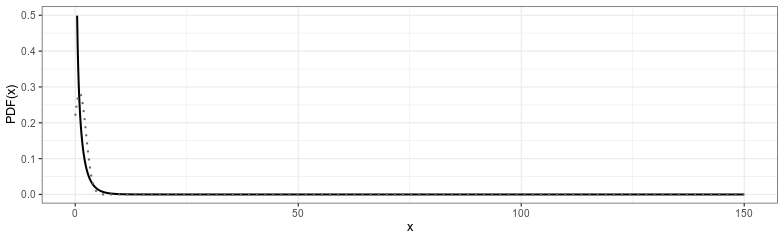



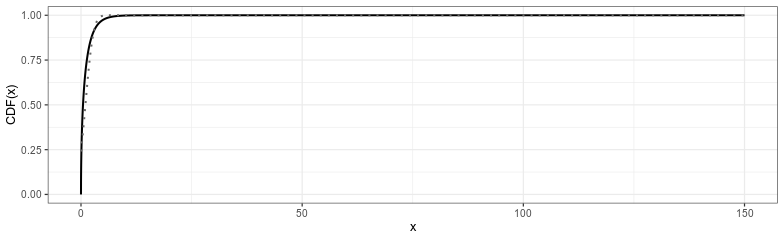


### How many tails for chi-square tests?

Unlike pingouin.ttest() and statsmodels.stats.proportion.proportions_ztest(), pingouin.chi2_independence() does not have an alternative argument to specify which tails are considered by the alternative hypothesis.

Which tail is almost always considered in chi-square tests?


#### Answer the question


#### Possible Answers

    
- Left-tailed ❌
    
    
- Right-tailed ✔
    
  
- Two-tailed ❌
    
  
- Neither: chi-square tests depend on the peak, not the tails ❌
    
  
- It depends on the problem ❌



Chi-square test of independence

The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

    
- EXW: "Ex works". The buyer pays for transportation of the goods.
  
  
- CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
  
  
- DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
  
  
- FCA: "Free carrier". The seller pays for transportation of the goods.

Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

$H_0$ : vendor_inco_term and freight_cost_group are independent.

$H_A$ : vendor_inco_term and freight_cost_group are associated.

late_shipments is available, and the following have been loaded: matplotlib.pyplot as plt, pandas as pd, and pingouin.


#### Instructions 
   

- Calculate the proportion of freight_cost_group in late_shipments grouped by vendor_inco_term.


- Unstack the .value_counts() result to be in wide format instead of long.


- Create a proportional stacked bar plot with bars filled based on freight_cost_group across the levels of vendor_inco_term.


- Perform a chi-square test of independence on freight_cost_group and vendor_inco_term in the late_shipments dataset.

In [ ]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data = late_shipments, 
                                                       x = 'vendor_inco_term',
                                                       y ='freight_cost_group')

# Print results
print(stats[stats['test'] == 'pearson']) 

#### Question

- What should you conclude from the hypothesis test?


#### Possible Answers


- Fail to reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are independent. ❌
  
  
- Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are independent. ❌
  
  
- Fail to reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated. ❌
  
  
- Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated. ✔


### Visualizing goodness of fit

The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

    EXW: 0.75
    CIP: 0.05
    DDP: 0.1
    FCA: 0.1

These frequencies are stored in the hypothesized DataFrame.

The incoterm_counts DataFrame stores the .value_counts() of the vendor_inco_term column.

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases.


#### Instructions 

    
- Find the number of rows in late_shipments.


- Add a column named n to the hypothesized DataFrame storing the prop column times n_total.


- Create a bar graph of 'n' versus 'vendor_inco_term' for the incoterm_counts data, specifying a yellow color and an alpha of 0.5.


- Add blue points to the plot showing the results from hypothesized.

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Make a yellow bar graph of vendor_inco_term versus n
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="yellow", alpha=0.5)

# Add blue points for hypothesized counts
plt.scatter(hypothesized['vendor_inco_term'], hypothesized['n'], color ='blue')
plt.show()

### Chi-square test of goodness of fit

The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

$H_0$: The sample matches with the hypothesized distribution.

$H_A$: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

late_shipments, incoterm_counts, and hypothesized from the last exercise are available. chisquare from scipy.stats has been loaded.


#### Instructions

- Using the incoterm_counts and hypothesized datasets, perform a chi-square goodness of fit test on vendor_inco_term.





In [ ]:
# Perform a goodness of fit test on vendor_inco_term
gof_test = chisquare(f_obs = incoterm_counts ['n'], f_exp = hypothesized['n'])


# Print gof_test results
print(gof_test)

#### Question

- What should you conclude from the hypothesis test?

#### Possible Answers

- Fail to reject the null hypothesis and conclude that vendor_inco_term follows the distribution specified by hypothesized_props. ❌
    
    
- Reject the null hypothesis and conclude that vendor_inco_term follows the distribution specified by hypothesized_props. ❌
    
    
- Fail to reject the null hypothesis and conclude that vendor_inco_term does not follow the distribution specified by hypothesized_props. ❌
  
  
- Reject the null hypothesis and conclude that vendor_inco_term does not follow the distribution specified by hypothesized_props. ✔




### Common assumptions of hypothesis tests

Hypothesis tests make assumptions about the dataset that they are testing, and the conclusions you draw from the test results are only valid if those assumptions hold. While some assumptions differ between types of test, others are common to all hypothesis tests.

Which of the following statements is a common assumption of hypothesis tests?


#### Answer the question


#### Possible Answers


- Sample observations are collected deterministically from the population. ❌
    
  
- Sample observations are correlated with each other. ❌
    
  
- Sample observations have no direct relationship with each other. ✔
    
  
- Sample sizes are greater than thirty observations. ❌


### Testing sample size

In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the late_shipments dataset.

Note that the .all() method from pandas can be used to check if all elements are true. For example, given a DataFrame df with numeric entries, you check to see if all its elements are less than 5, using (df < 5).all().

late_shipments is available, and pandas is loaded as pd.


#### Instructions 


- Get the count of each value in the freight_cost_group column of late_shipments.
      
      
- Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.


- Get the count of each value in the late column of late_shipments.


- Insert a suitable number to inspect whether the counts are "big enough" for a one sample proportion test.


- Get the count of each value in the freight_cost_group column of late_shipments grouped by vendor_inco_term.
    
    
- Insert a suitable number to inspect whether the counts are "big enough" for a chi-square independence test.


- Get the count of each value in the shipment_mode column of late_shipments.
  
  
- Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.



In [ ]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_group'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())


# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())


# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby(['vendor_inco_term'])['freight_cost_group'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())


# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

### Which parametric test?

Which test is a parametric equivalent to the Wilcoxon signed-rank test?

#### Answer the question


#### Possible Answers

- z-test for a difference in proportions ❌
    
    
- Chi-square goodness of fit test ❌
   
   
- Paired t-test  ✔
   
   
- ANOVA ❌


### Wilcoxon signed-rank test

You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

sample_dem_data is available, and has columns dem_percent_12 and dem_percent_16 in addition to state and county names. The following packages have also been loaded: pingouin and pandas as pd.


#### Instructions 

    
- Conduct a paired t-test on the percentage columns using an appropriate alternative hypothesis.


- Conduct a Wilcoxon-signed rank test on the same columns.


In [ ]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results =  pingouin.ttest(x= sample_dem_data['dem_percent_12'],
                                     y= sample_dem_data['dem_percent_16'],
                                     paired= True,
                                     alternative= 'greater')




# Print paired t-test results
print(paired_test_results)


# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x = sample_dem_data['dem_percent_12'],
                                          y = sample_dem_data['dem_percent_16'], 
                                          alternative = 'greater') 


# Print Wilcoxon test results
print(wilcoxon_test_results)

### Wilcoxon-Mann-Whitney

Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.


#### Instructions


- Select weight_kilograms and late from late_shipments, assigning the name weight_vs_late.
    
    
- Convert weight_vs_late from long-to-wide format, setting columns to 'late'.
  
    
- Run a Wilcoxon-Mann-Whitney test for a difference in weight_kilograms when the shipment was late and on-time.



In [ ]:
# Choose the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns = 'late', values = 'weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x= weight_vs_late_wide['No'], y= weight_vs_late_wide['Yes'], alternative = 'two-sided')



# Print the test results
print(wmw_test)

### Kruskal-Wallis

Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

    
#### Instructions


-  Run a Kruskal-Wallis test on weight_kilograms between the different shipment modes in late_shipments.


In [ ]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data = late_shipments, dv= 'weight_kilograms', between = 'freight_cost_groups')



# Print the results
print(kw_test)